# Keras LSTM ile Uçak Yolcu Sayısı Tahmini (Zaman Serisi Tahmini) Projesi

Soru: Önceki iki aya ait yolcu sayısı  verildiğinde, gelecek ay yolcu sayısı kaçtır?

### LSTM (Long Short-Term Memory) Derin Öğrenme Modeli

LSTM, zaman serisi verileri ve sıralı veri analizinde kullanılan özel bir tekrarlayan sinir ağı (RNN) türüdür. Standart RNN'lerin uzun vadeli bağımlılıkları öğrenmedeki sınırlamalarını aşmak için tasarlanmıştır.

#### 1-Hücre Durumu (Cell State): Bilginin uzun süre saklandığı bir tür "bellek bandı" işlevi görür.

#### 2-Kapılar (Gates): Bilgi akışını kontrol eden üç temel kapı vardır:

    Unut Kapısı (Forget Gate): Hücre durumunda hangi bilgilerin unutulacağına karar verir

    Giriş Kapısı (Input Gate): Yeni gelen bilgilerden hangilerinin hücre durumuna ekleneceğini belirler

    Çıkış Kapısı (Output Gate): Güncellenmiş hücre durumundan hangi bilgilerin çıktı olarak kullanılacağını belirler

Bu karmaşık yapı, LSTM'in uzun sıralı verilerde dahi önemli bilgileri hatırlayabilmesini ve önemsiz bilgileri unutabilmesini sağlar.

### LSTM'in Avantajları

    Uzun vadeli bağımlılıkları öğrenebilir
    Kaybolan gradyan (vanishing gradient) problemine çözüm sunar
    Sıralı verilerde yüksek başarı gösterir
    Farklı uzunluklardaki veri dizileriyle çalışabilir

### Tipik LSTM Uygulamaları

    Dil modelleme ve metin üretimi
    Konuşma tanıma
    Duygu analizi
    Zaman serisi tahmini
    Anomali tespiti
    Müzik kompozisyonu


### Zaman Serisi (Time Series) Analizi
Zaman serisi, belirli zaman aralıklarında sıralı olarak kaydedilen veri noktaları koleksiyonudur. Her veri noktası belirli bir zaman damgasıyla ilişkilendirilmiştir.

### LSTM ile Zaman Serisi Analizi

LSTM'ler zaman serisi analizinde özellikle şu durumlarda güçlüdür:

    Karmaşık Desenlerin Yakalanması: Doğrusal olmayan ve karmaşık zaman ilişkilerini öğrenebilir.
    Çok Değişkenli Analiz: Birden fazla değişkenin etkisini aynı anda modelleyebilir.
    Uzun Vadeli Bağımlılıklar: Çok önceki zaman noktalarındaki bilgilerin mevcut tahminlere etkisini yakalayabilir.

### Pratik LSTM Zaman Serisi Uygulamaları:
    Hisse senedi fiyat tahmini
    Elektrik tüketimi tahminleri
    Hava durumu tahmini
    Satış ve talep tahminleri
    Endüstriyel ekipman arıza tahminleri
    Web sitesi ziyaret trafiği tahmini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.rename(columns={"#Passengers":"passengers"},inplace=True)

In [4]:
data.head()

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data=data["passengers"]
data.head()

0    112
1    118
2    132
3    129
4    121
Name: passengers, dtype: int64

In [10]:
data=np.array(data).reshape(-1,1)

In [13]:
type(data)

numpy.ndarray

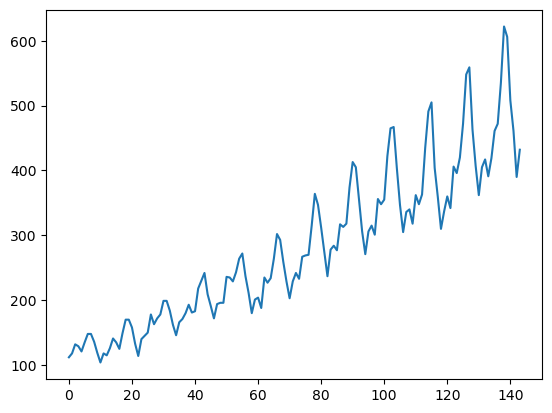

In [16]:
plt.plot(data)
plt.savefig('RealData.png')
plt.show()

In [17]:
scaling=MinMaxScaler()

data=scaling.fit_transform(data)

In [18]:
len(data)

144

In [20]:
train=data[0:100,:]
test=data[100:,:]

In [24]:
def get_data(data,steps):
    dataX=[]
    dataY=[]
    for i in range(len(data)-steps-1):
        a=data[i:(i+steps),0]
        dataX.append(a)
        dataY.append(data[i+steps,0])
    return np.array(dataX),np.array(dataY)

Bu fonksiyon, zaman serisi verilerini LSTM modeli gibi sıralı modeller için uygun giriş-çıkış çiftlerine dönüştürmek amacıyla kullanılır. Fonksiyonun amacı, geçmiş veri noktalarından gelecekteki değerleri tahmin etmeye yönelik bir model eğitmek için veri hazırlamaktır.

Fonksiyonun işleyişi şöyle:

    İki boş liste oluşturuluyor: dataX (giriş verileri için) ve dataY (hedef/çıkış verileri için)

Veri üzerinde for döngüsü ile geziniyor:

    Her adımda, i pozisyonundan başlayarak steps kadar ardışık veri öğesi alınıyor
    Bu veri parçası dataX listesine ekleniyor (model girişi)
    Bundan hemen sonraki değer (i+steps konumundaki) dataY listesine ekleniyor (modelin tahmin etmesi gereken değer)


Son olarak, bu listeleri numpy dizilerine dönüştürüp döndürüyor

In [43]:
steps=2

In [44]:
X_train, y_train = get_data(train,steps)
X_test, y_test = get_data(test,steps)

In [45]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [46]:
model=Sequential()
model.add(LSTM(128,input_shape=(1,steps)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

C:\Users\yigit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,393 (294.50 KB)

 Trainable params: 75,393 (294.50 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(X_train,y_train,epochs=25,batch_size=1)

Epoch 1/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0182
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036
Epoch 8/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 9/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 10/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 11/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 12/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 13/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 14/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 15/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 16/25
97/97 ━

In [49]:
y_pred=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [50]:
y_pred=scaling.inverse_transform(y_pred)
y_test=y_test.reshape(-1,1)
y_test=scaling.inverse_transform(y_test)

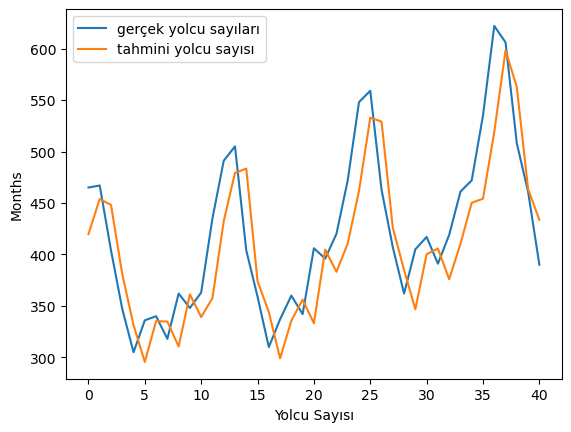

In [52]:
plt.plot(y_test,label="gerçek yolcu sayıları")
plt.plot(y_pred,label="tahmini yolcu sayısı")
plt.ylabel("Months")
plt.xlabel("Yolcu Sayısı")
plt.legend()
plt.savefig('ModelinTahmini.png')
plt.show()

### 1-Epochs
    Tanım: Modelin eğitim veri seti üzerinde kaç tur (iterasyon) tam olarak eğitim alacağını belirtir.
    Ne İşe Yarar: Veri setiniz bir kez (1 epoch) baştan sona modele verilip, model ağırlıkları her adımdan sonra güncellenir. Toplamda epochs kadar bu süreç tekrarlanır.
    Etkisi: Epoch sayısının yüksek olması, modelin veri üzerinde daha uzun süre eğitilmesi anlamına gelir. Gereğinden fazla olursa aşırı öğrenmeye (overfitting) sebep olabilir, çok düşük tutulursa model yeterince öğrenemeyebilir.

### 2-Batch Size
    Tanım: Her bir adımda modele verilecek veri örneklerinin sayısını belirtir.
    Ne İşe Yarar: Tüm veri seti bir anda yerine küçük parçalara (mini batch) bölünerek eğitim yapılır. Her batch için ağırlık güncellemeleri yapılır.
    Etkisi:
    Küçük batch boyutu (örneğin 16, 32): Daha sık ağırlık güncellemesi yapar, ancak her güncellemede daha fazla dalgalanma (noise) olabilir.
    Büyük batch boyutu (örneğin 128, 256): Güncellemeler daha istikrarlı olabilir ancak eğitim daha yavaş (hesaplama gereksinimi daha büyük) ilerleyebilir ve bazen modelin genelleme kapasitesi kötü etkilenebilir.

### 3-Optimizer (Optimizasyon Yöntemi)
    Tanım: Ağın ağırlıklarını güncellemek için kullanılan algoritmadır (örn. Adam, SGD, RMSprop vb.).
    Ne İşe Yarar: Hata fonksiyonundan (loss function) elde edilen gradyanlar ile, modelin parametrelerini daha iyi bir sonuç verecek şekilde adım adım iyileştirir.
    Etkisi: Farklı optimize ediciler farklı güncelleme stratejileri izler.
    Adam: Genellikle hızlı yakınsama ve istikrarlı sonuçlar sağlar, çoğu problemde yaygın kullanılır.
    SGD (Stochastic Gradient Descent): Basit ve çoğu zaman daha yavaş olabilir ancak çok büyük veri setlerinde veya online öğrenmede işe yarar.

### 4-Loss (Hata Fonksiyonu)
    Tanım: Modelin çıkışıyla hedef değer arasındaki farkı ölçen metrik.
    Ne İşe Yarar: Eğitimin amacı bu hatayı minimize etmektir. LSTM ile zaman serisi tahmininde genellikle mean_squared_error (mse) veya mean_absolute_error (mae) kullanılır.
    Etkisi: Seçilen hata fonksiyonu, modelin hangi yönü öğrenmesini istediğinizi doğrudan belirler. Farklı hata fonksiyonları farklı optimizasyon davranışlarına ve sonuçlara yol açabilir.

### 5-Learning Rate (Öğrenme Hızı)
    Tanım: Optimizasyon algoritmasının bir adımda ağırlıkları ne kadar değiştireceğini belirleyen sabittir (örneğin lr=0.001).
    Ne İşe Yarar: Çok yüksek learning rate, ağırlıkların hızlı fakat kararsız güncellenmesine neden olabilir. Çok düşük olursa modelin yakınsaması çok uzun sürebilir veya yerel minimumdan çıkması zorlaşabilir.
    Etkisi: Genelde optimizer parametreleri içinde ayarlanır (Adam(lr=0.001) gibi).

### 6-Units / Neurons (LSTM katmanındaki nöron sayısı)
    Tanım: LSTM hücresinin (katmanının) içindeki nöron sayısını belirler.
    Ne İşe Yarar: Daha fazla nöron, modelin daha karmaşık kalıpları öğrenmesini sağlayabilir ancak hesapsal yükü ve aşırı öğrenme ihtimalini de artırır.
    Etkisi: Model kapasitesini doğrudan etkiler. Çok az ise underfitting, çok fazla ise overfitting görülebilir. Doğru dengeyi bulmak için denemeler yapmak gerekir.

### 7-Dropout
    Tanım: Eğitim sırasında katmandaki bazı nöronları rastgele devre dışı bırakma oranını ifade eder (örneğin dropout=0.2 ile %20 devre dışı).
    Ne İşe Yarar: Modelin belirli nöronlara aşırı bağımlı olmasını engelleyerek aşırı öğrenmeyi (overfitting) azaltır.
    Etkisi: Çok yüksek dropout değeri öğrenmeyi zorlaştırabilir, çok düşük değer ise aşırı öğrenmeyi yeterince önleyemeyebilir.
### 8-Activation Fonksiyonları
    Tanım: Nöronların çıkışını şekillendiren fonksiyonlardır (örn. relu, tanh, sigmoid vb.).
    Ne İşe Yarar: Doğrusal olmayan yapıları modele kazandırır. LSTM içinde genellikle tanh ve sigmoid dahili olarak kullanılır, ek katmanlarda farklı aktivasyonlar tercih edilebilir.
    Etkisi: Aktivasyon fonksiyonunun seçimi, modelin nasıl öğrendiğini büyük ölçüde değiştirebilir (örneğin relu derin ağlarda sıkça tercih edilirken, LSTM hücrelerinde genelde varsayılan olarak tanh kullanılır).

### 9-Validation Split / Validation Data
    Tanım: Eğitim verisinin bir kısmını doğrulama (validation) için ayırma oranı (validation_split=0.2 gibi).
    Ne İşe Yarar: Modelin eğitimi sırasında overfitting olup olmadığını gözlemlemek için kullanılır. Eğitim verisine dahil edilmez; her epoch sonunda doğrulama seti üzerinde sonuç ölçülür.
    Etkisi: Eğitim esnasında doğrulama kaybı (validation loss) ve doğrulama metriğini izlemek, modelin ne zaman durdurulması gerektiği ve model seçimi konusunda fikir verir.

### 10-Verbose

    Tanım: Eğitim sürecinde ekrana yazdırılacak ayrıntı seviyesini kontrol eder (verbose=0, verbose=1, verbose=2).
    Ne İşe Yarar: Eğitim ilerlerken konsolda, epoch bazında ya da adım bazında detaylı çıktılar almak isteyebilirsiniz.
    Etkisi: Eğitim sırasında takip edeceğiniz bilginin miktarını belirler. Modelin eğitim süresi üzerinde doğrudan bir etkisi yoktur; daha çok kullanıcıya bilgilendirme amaçlıdır.


Yukarıda sayılan parametreler, zaman serisi tahmini veya diğer derin öğrenme modellerinin eğitiminde en kritik bileşenler arasındadır. Genel yaklaşım, bu değerler için önce yaygın kabul görmüş varsayılan ayarları veya literatürdeki örnek ayarları deneyip, ardından doğrulama seti (validation) ve/veya çapraz doğrulama (cross-validation) sonuçlarına göre ince ayarlar yapmaktır.
